# **Capstone Project - The Battle of Neighborhood**
### Applied Data Science Capstone by IBM/Coursera

## **Table of Content**
1. Introduction: Bussiness Problem
2. Data
3. Methodology
4. Analysis
5. Result and Discussion
6. Conclusion

## 1. Introduction: Bussiness Problem

In this project we are going to look for an optional location to open a movie theater. Especially, this report can provide a reference for stakeholder who are interested in movie theater in **Surabaya, East Java, Indonesia**.

Surabaya is the capital of the Indonesian province of East Java. According to the National Development Planning Agency, Surabaya is one of the four main central cities of Indonesia, alongside Jakarta, Medan, and Makassar. The city has a population of 2.89 million within its city limits in 2019 and 9.5 million in the extended Surabaya metropolitan area, making it the second-largest metropolitan area in Indonesia.

Apart from being useful as a means of entertainment, the cinema also serves as a way to reduce the public from watching pirated films. The surrounding economy will move. We will summarize the number and locations of existing cinemas in Surabaya, then use data science tools to analyze of suitable locations for building new cinemas.

The preferred location for building a new cinema must have a minimum number of existing cinemas. Cinemas are usually not far from the mall. Therefore, we will also consider locations to have the maximum number of malls. Then, we will combine it with demographic data for each sub-district in the city of Surabaya. Thus, stakeholders can make final decisions based on the results of the analysis.

## 2. Data

Based on the definition of our problem, factors that may impact our decision are:
*   Demographic information, e.g. population, density, education, health, area.
*   Number of existing shopping malls in the neighborhood and nearby
*   Number of existing movie theaters in the neighborhood and nearby

In this project, we will fetch or extract data from the following data sources:
*   [Surabaya census information](https://surabayakota.bps.go.id/)
*   Shopping malls and movie theaters data in every neighborhood will be obtained using Foursquare API
*   Coordinate center of Surabaya will be obtained using Positionstack Geocoding API of well known Surabaya location.
*   Surabaya borough shapefile is obtained from [Open Street Map](https://openstreetmap.id/en/data-surabaya/).

### Census Data of Surabaya

In order to find region of Surabaya, I am looking in internet and find the resources from [BPS](https://surabayakota.bps.go.id/), BPS (Badan Pusat Statistik) or Statistical Center Data of Surabaya. I collect the data then make it to 1 file. I only focus on several basic census information: Population, Density, Area, Education and Health.

In [1]:
# The code was removed by Watson Studio for sharing.

The area unit in the data frame is square meters. Thus, the population density unit becomes people / square meter.

In [2]:
census_data = pd.read_excel(io.BytesIO(body.read()))
census_data.rename(columns={'Borough':'Neighborhood'}, inplace=True)
census_data

,Neighborhood,Area,Population,Density,Health,Education
0,Tegalsari,4300,85606,19.908372,78.5,94.3
1,Genteng,4100,46548,11.353171,78.1,94.4
2,Bubutan,3900,84465,21.657692,75.8,84.4
3,Simokerto,2600,79319,30.507308,74.7,83.2
4,Pabeancantikan,6800,69423,10.209265,73.0,84.6
5,Semampir,8800,151429,17.207841,74.3,85.9
6,Krembangan,8300,106664,12.851084,76.1,88.9
7,Kenjeran,7800,163438,20.953590,75.2,84.2
8,Bulak,6700,37214,5.554328,75.8,83.5
9,Tambaksari,9000,204805,22.756111,76.6,88.6


### Coordinate of Surabaya Neighborhood
Coordinate of Surabaya neighborhood will be obtained from geojson file that obtained from Open Street Map, while center of surabaya obtained using Positionstack Geocoding API of well known Surabaya location.

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
# Define method to obtain the latitude and longitude of Surabaya neighborhood
import http.client, urllib.parse
import json

def get_coordinates(address, api_key=positionstack_api_key):
    try:
        conn = http.client.HTTPConnection('api.positionstack.com')
        params = urllib.parse.urlencode({
          'access_key': positionstack_api_key,
          'query': address,
          'limit': 1,
        })
        conn.request('GET', '/v1/forward?{}'.format(params))
        res = conn.getresponse()
        data = json.loads(res.read().decode('utf-8'))
        lat = data['data'][0]['latitude']
        lon = data['data'][0]['longitude']
        return [lat, lon]
    except:
        return None
    
      
address = 'Wonokromo, Surabaya'

surabaya_center = get_coordinates(address)
print('Coordinate of "{}": {}'.format(address, surabaya_center))

Coordinate of "Wonokromo, Surabaya": [-7.302041, 112.739275]


In [5]:
# Conversely, define a method to get address information given latitude and longtitude
def get_address(latitude, longitude, api_key=positionstack_api_key):
    try:
        conn = http.client.HTTPConnection('api.positionstack.com')
        params = urllib.parse.urlencode({
          'access_key': positionstack_api_key,
          'query': str(latitude)+',' +str(longitude),
        })
        conn.request('GET', '/v1/reverse?{}'.format(params))
        res = conn.getresponse()
        result = json.loads(res.read().decode('utf-8'))
        address = result['data'][0]['label']
        return address
    except:
        return None

address = get_address(*surabaya_center)
print('Reverse geocoding check')
print('-----------------------')
print('Address of [{}, {}] is: {}'.format(*surabaya_center, address))

Reverse geocoding check
-----------------------
Address of [-7.302041, 112.739275] is: 1 Jalan Stasiun Wonokromo, Surabaya, Indonesia


Next, Surabaya sits on an java island, I only focus on the area in the Surabaya, so try to find the boundary of Surabaya first.
I download Surabaya shapefile (in geojson format) from Open Street Map which defines boundaries of borough on Surabaya.

In [6]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_c0dc746c5a8f4be3bc4001db87f6e419.get_object(Bucket='capstoneproject-donotdelete-pr-3viepobsnzfn2e', Key='Kecamatan_Surabaya.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [7]:
# Set flag to true if we load the data from IBM Cloud
From_IBM_Cloud = True

In [8]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [9]:
def load_dict(fileobject):
    '''Load the file contents into a Python dict'''
    text = fileobject.read()
    dictformat = json.loads(text)
    return dictformat

In [10]:
!pip install shapely
import os
import json
from shapely.geometry import shape, Point, Polygon

def read_geojson(filepath):
    with open(filepath, 'r') as f:
        js = json.load(f)
    return js

# get boundary from a geojson file
# output format: (minx, miny, maxx, maxy) tuple (float values) 
def get_boundary_from_geojson(geojson):
    js = read_geojson(geojson) if isinstance(geojson, str) else geojson
    polygon = [shape(feature['geometry']).bounds for feature in js['features']]

    boundary = []
    for p in polygon:
        boundary.append((p[0], p[1]))
        boundary.append((p[2], p[3]))
    return Polygon(boundary).bounds

# Given a point, check whether it's within the boundaries defined by GeoJSON file
# input: point = (longtitude, latitude)
# output: True if in polygon of geojson file
def is_in_geojson(geojson, point, verbose=False):    
    js = read_geojson(geojson) if isinstance(geojson, str) else geojson
    pos = point if isinstance(point, Point) else Point(point)
    
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(pos):
            if verbose: print('Found in borough: ', feature['properties'])
            return True
    return False

# load GeoJSON file containing surabaya boroughs
geoJson = load_dict(streaming_body_1) if From_IBM_Cloud else os.path.join(os.getcwd(), 'Kecamatan_Surabaya.geojson')
# get the boundaries of Montreal island
surabaya_boundary = get_boundary_from_geojson(geoJson)
print(f'The boundaries of Surabaya City: {surabaya_boundary}\n')

# check whether surabaya center is on Montreal island
point = Point((surabaya_center[1], surabaya_center[0]))
print(f'Surabaya center ({point.x}, {point.y}) in geojson file: {is_in_geojson(geoJson, point, True)}')

The boundaries of Surabaya City: (112.5915698, -7.3514405, 112.84644, -7.1919398)

Found in borough:  {'id': 'relation/8225796', '@id': 'relation/8225796', 'admin_level': '6', 'name': 'Wonokromo', 'type': 'boundary', 'boundary': 'administrative', 'is_in:city': 'Surabaya', 'is_in:province': 'Jawa Timur', 'source': 'HOT_InAWARESurvey_2016'}
Surabaya center (112.739275, -7.302041) in geojson file: True


In [11]:
!pip install folium
import folium
from folium.features import DivIcon

But we also can notice it uses latitude and longitude degrees(WGS84 spherical coordinate system) in the geojson definition file, not the common metric unit - meter or kilometer which is UTM Cartesian coordinate system (X/Y coordinates in meters).

So I will create several methods to convert latitude and longitude degrees into meters and vice versa.

In [12]:
# !pip install shapely
import shapely.geometry

!pip install pyproj
import pyproj

import math

In [13]:
def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=18, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=18, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

def calc_lonlat_distance(lon1, lat1, lon2, lat2):
    x1, y1 = lonlat_to_xy(lon1, lat1)
    x2, y2 = lonlat_to_xy(lon2, lat2)
    return calc_xy_distance(x1, y1, x2, y2)

print('Coordinate transformation check')
print('-------------------------------')
print('Surabaya center longitude = {}, latitude = {}'.format(surabaya_center[1], surabaya_center[0]))
x, y = lonlat_to_xy(surabaya_center[1], surabaya_center[0])
print('Surabaya center UTM X = {}, Y = {}'.format(x, y))
lo, la = xy_to_lonlat(x, y)
print('Surabaya center longitude = {}, latitude = {}'.format(lo, la))
distance = calc_lonlat_distance(*surabaya_boundary)
print(f'Distance from most southwest point to most northeast point in Surabaya is {distance} meters.')
sby_min_x, sby_min_y = lonlat_to_xy(surabaya_boundary[2], surabaya_boundary[3])
sby_max_x, sby_max_y = lonlat_to_xy(surabaya_boundary[0], surabaya_boundary[1])
print(f'Distance from west to east in Surabaya is {sby_max_x-sby_min_x} meters.')
print(f'Distance from north to south in Surabaya is {sby_max_y-sby_min_y} meters.')

Coordinate transformation check
-------------------------------
Surabaya center longitude = 112.739275, latitude = -7.302041
Surabaya center UTM X = -356791.18971861945, Y = -19181402.5538869
Surabaya center longitude = 112.73927500000002, latitude = -7.302040999999997
Distance from most southwest point to most northeast point in Surabaya is 33503.57064329469 meters.
Distance from west to east in Surabaya is 28689.924164486234 meters.
Distance from north to south in Surabaya is 17302.528638504446 meters.


Let's Visualize!

In [14]:
def boroughs_style(feature):
    return { 'color': 'blue' }

sby_center_x, sby_center_y = lonlat_to_xy(surabaya_center[1], surabaya_center[0]) # City center in Cartesian coordinates
surabaya_boroughs = geoJson if From_IBM_Cloud else read_geojson(geoJson)
center = xy_to_lonlat((sby_max_x+sby_min_x)/2, (sby_max_y+sby_min_y)/2)
map_surabaya = folium.Map(location=(center[1], center[0]), zoom_start=12)
folium.Marker(surabaya_center, popup='Jalan Stasiun Wonokromo').add_to(map_surabaya)
folium.GeoJson(surabaya_boroughs, style_function=boroughs_style, name='geojson').add_to(map_surabaya)

map_surabaya

Nice!

From the map, we can see all the candidate neighborhoods within Surabaya city.

In [15]:
# Get center coordinates of each borough

def get_borough_center(borough_geojson):
    center = []
    for feature in borough_geojson['features']:
        polygon = shape(feature['geometry'])
        name = feature['properties']['name']
        center.append((name, polygon.centroid.y, polygon.centroid.x))
    return center


surabaya_borough_centers = get_borough_center(surabaya_boroughs)
print(f'{len(surabaya_borough_centers)} center coordinates are generated.')
surabaya_borough_centers = pd.DataFrame(surabaya_borough_centers).rename(columns={0:'Neighborhood', 1: 'Latitude', 2: 'Longitude'})
surabaya_borough_centers

31 center coordinates are generated.


,Neighborhood,Latitude,Longitude
0,Genteng,-7.258943,112.744854
1,Simokerto,-7.239466,112.753292
2,Semampir,-7.213868,112.748414
3,Kenjeran,-7.217600,112.768674
4,Bulak,-7.236022,112.788849
5,Krembangan,-7.228817,112.721646
6,Bubutan,-7.248752,112.727749
7,Sawahan,-7.273047,112.721540
8,Sukomanunggal,-7.268823,112.699726
9,Asemrowo,-7.237168,112.690060


Let's check is it name is exactly same or there are some different names from census data.

In [16]:
df3 = pd.merge(census_data, surabaya_borough_centers , how='outer', indicator='Exist')
df3 = df3.loc[df3['Exist'] != 'both']
df3[['Neighborhood', 'Exist']]

,Neighborhood,Exist
4,Pabeancantikan,left_only
18,Karangpilang,left_only
31,Karang Pilang,right_only
32,Pabean Cantian,right_only


we have 2 difference, let's fixed it.

In [17]:
census_data = census_data.replace({'Neighborhood':'Karangpilang'},'Karang Pilang')
census_data = census_data.replace({'Neighborhood':'Pabeancantikan'},'Pabean Cantian')

When data is okay, let's merge it!

In [18]:
data_surabaya = census_data.merge(surabaya_borough_centers,
              how='inner',
              left_on='Neighborhood',
              right_on='Neighborhood')
data_surabaya

,Neighborhood,Area,Population,Density,Health,Education,Latitude,Longitude
0,Tegalsari,4300,85606,19.908372,78.5,94.3,-7.275490,112.736792
1,Genteng,4100,46548,11.353171,78.1,94.4,-7.258943,112.744854
2,Bubutan,3900,84465,21.657692,75.8,84.4,-7.248752,112.727749
3,Simokerto,2600,79319,30.507308,74.7,83.2,-7.239466,112.753292
4,Pabean Cantian,6800,69423,10.209265,73.0,84.6,-7.219347,112.733570
5,Semampir,8800,151429,17.207841,74.3,85.9,-7.213868,112.748414
6,Krembangan,8300,106664,12.851084,76.1,88.9,-7.228817,112.721646
7,Kenjeran,7800,163438,20.953590,75.2,84.2,-7.217600,112.768674
8,Bulak,6700,37214,5.554328,75.8,83.5,-7.236022,112.788849
9,Tambaksari,9000,204805,22.756111,76.6,88.6,-7.250825,112.767967


### Foursquare API

Now I generated all the candidate neighborhoods on Surabaya, I will get all movie theaters information using Foursquare API. Let's fetch all the venue on Surabaya first. To do so, we will fetch movie theaters and shopping mall data in each borough.

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
# get the longitude and latitude of borough
borough_latitude = data_surabaya.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = data_surabaya.loc[0, 'Longitude'] # neighborhood longitude value

borough_name = data_surabaya.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Tegalsari are -7.275489552513043, 112.73679181135408.


In [22]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius since i am using 3 km equals 3,000 m
# We will set bigger searching area to overlap each other so we don't miss any movie theater on Surabaya. 
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)

In [23]:
# get json of that links
results = requests.get(url).json()

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
# get venues name, categories, latitude, and longitude
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arumanis Restaurant,Restaurant,-7.271163,112.740699
1,Bon Ami,Bakery,-7.283387,112.735248
2,Uniqlo (ユニクロ) (Uniqlo),Clothing Store,-7.262860,112.739170
3,Tunjungan Plaza 6,Shopping Mall,-7.262290,112.738271
4,Tunjungan 5 XXI,Movie Theater,-7.261345,112.739524


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
# get venues is in what neighborhood
surabaya_venues = getNearbyVenues(names=data_surabaya['Neighborhood'],
                                   latitudes=data_surabaya['Latitude'],
                                   longitudes=data_surabaya['Longitude']
                                  )
surabaya_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tegalsari,-7.27549,112.736792,Arumanis Restaurant,-7.271163,112.740699,Restaurant
1,Tegalsari,-7.27549,112.736792,Bon Ami,-7.283387,112.735248,Bakery
2,Tegalsari,-7.27549,112.736792,Uniqlo (ユニクロ) (Uniqlo),-7.262860,112.739170,Clothing Store
3,Tegalsari,-7.27549,112.736792,Tunjungan Plaza 6,-7.262290,112.738271,Shopping Mall
4,Tegalsari,-7.27549,112.736792,Tunjungan 5 XXI,-7.261345,112.739524,Movie Theater


From Foursquare API documentation, we can find the corresponding moivie theater category in [Venue Categories](https://developer.foursquare.com/docs/build-with-foursquare/categories/). Theater in Foursquare is under Arts & Entertainment main category. It contains several sub-categories:

*    Drive-in Theater
*    Indie Movie Theater
*    Multiplex

Then, From Foursquare API documentation, there are several categories related with shopping mall or shopping centers.

*    Shopping Mall	
*    Shopping Plaza	
*    Outlet Mall	
*    Outlet Store	
*    Supermarket	
 

In [29]:
import numpy as np
surabaya_venues['Distance Venue to Neighborhood'] = np.vectorize(calc_lonlat_distance)(surabaya_venues['Neighborhood Longitude'], surabaya_venues['Neighborhood Latitude'], surabaya_venues['Venue Longitude'], surabaya_venues['Venue Latitude'])
surabaya_venues.shape

(3100, 8)

In [30]:
surabaya_venues= surabaya_venues.sort_values('Distance Venue to Neighborhood').drop_duplicates(subset=['Venue', 'Venue Longitude', 'Venue Latitude', 'Venue Category'], keep='first')
surabaya_venues.shape

(366, 8)

In [31]:
#drop rows that not contain sub-category from movie theater or shopping mall.
movie_category = ['Movie Theater','Drive-in Theater', 'Indie Movie Theater', 'Multiplex']
mall_category = [ 'Shopping Mall', 'Shopping Plaza', 'Outlet Mall', 'Outlet Store', 'Supermarket']
surabaya_movie = surabaya_venues[surabaya_venues['Venue Category'].isin(movie_category)]
surabaya_mall = surabaya_venues[surabaya_venues['Venue Category'].isin(mall_category)]

In [32]:
surabaya_movie.reset_index(drop=True)
print('There are {} movie theater in Surabaya '.format(surabaya_movie.shape[0]))
surabaya_movie.head()

There are 9 movie theater in Surabaya 


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance Venue to Neighborhood
101,Genteng,-7.258943,112.744854,The Premiere,-7.261219,112.739538,Multiplex,644.278009
100,Genteng,-7.258943,112.744854,Tunjungan 5 XXI,-7.261345,112.739524,Movie Theater,651.339111
112,Genteng,-7.258943,112.744854,Grand City XXI,-7.261631,112.750340,Multiplex,680.773524
206,Bubutan,-7.248752,112.727749,CGV Cinemas,-7.254282,112.732692,Multiplex,826.926333
1720,Wonokromo,-7.297717,112.737909,Sutos XXI,-7.294064,112.729590,Multiplex,1012.292539


In [33]:
surabaya_mall.reset_index(drop=True)
print('There are {} mall in Surabaya '.format(surabaya_mall.shape[0]))
surabaya_mall.head()

There are 23 mall in Surabaya 


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance Venue to Neighborhood
104,Genteng,-7.258943,112.744854,Tunjungan Plaza 5,-7.261434,112.739563,Shopping Mall,651.531129
159,Genteng,-7.258943,112.744854,Grand City,-7.261586,112.750759,Shopping Mall,720.904447
150,Genteng,-7.258943,112.744854,Tunjungan Plaza,-7.263186,112.739825,Shopping Mall,733.345380
116,Genteng,-7.258943,112.744854,99 Ranch Market,-7.264796,112.741016,Supermarket,780.422172
106,Genteng,-7.258943,112.744854,Tunjungan Plaza 6,-7.262290,112.738271,Shopping Mall,822.879825


Let's show the map that contain mall and movie theater

In [34]:
# Show movie theaters and shopping malls locations on one map
# shopping mall is in the yellow, cinema in the red
center = xy_to_lonlat((sby_max_x+sby_min_x)/2, (sby_max_y+sby_min_y)/2)
map_surabaya = folium.Map(location=(center[1], center[0]), zoom_start=12)
folium.Marker(surabaya_center, popup='Jalan Stasiun Wonokromo').add_to(map_surabaya)
folium.GeoJson(surabaya_boroughs, style_function=boroughs_style, name='geojson').add_to(map_surabaya)
for res in surabaya_mall.index:
    lat = surabaya_mall['Venue Latitude'][res]; lon = surabaya_mall['Venue Longitude'][res]
    color = 'yellow'
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_surabaya)
for res in surabaya_movie.index:
    lat = surabaya_movie['Venue Latitude'][res]; lon = surabaya_movie['Venue Longitude'][res]
    color = 'red'
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_surabaya)

map_surabaya

Unlike coffee shops, restaurants everywhere, there aren't lots of movie theaters in the region, it also makes sense since we don't expect movie theater in every block.

## 3. Methodology

The business purpose of this project is to find a suitable place in Surabaya to open a movie theater.
Now we retrieved the following data:
1. All movie theaters data in Surabaya
2. All shopping centers data in Surabaya
3. Surabaya census data for each borough, concretely, Population, Density, Area, Education and Health data for each borough.
4. Boundary data of each borough in Surabaya

Based on the above raw data, we will try to explore that data more deeply then generate features accordingly. Then, using K-Means to helping us devide into cluster so we can understand the most promising areas with more shopping malls and fewer movie theaters combine with census data.

## 4. Analysis

First of all, I will show you the census data distribution on a choropleth map and include the locations of theaters and malls.

In [57]:
def show_choropleth_map(geo_data, dataframe, columns, legend_name, cinemas=None, malls=None):
    bins = list(dataframe[columns[1]].quantile([0, 0.25, 0.5, 0.75, 1]))
    center = xy_to_lonlat((sby_max_x+sby_min_x)/2, (sby_max_y+sby_min_y)/2)
    map = folium.Map(location=(center[1], center[0]), zoom_start=12)
    folium.TileLayer('cartodbpositron').add_to(map)    #cartodbpositron cartodbdark_matter
    folium.Choropleth(
        geo_data=geo_data,
        data=dataframe,
        columns=columns,
        key_on='feature.properties.name',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        bins=bins,
        legend_name=legend_name
    ).add_to(map)

    if malls is not None:
        for lat, lon in malls:
            folium.CircleMarker([lat, lon], radius=4, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map)
    if cinemas is not None:
        for lat, lon in cinemas:
            folium.CircleMarker([lat, lon], radius=4, color='red', weight=1, fill=True, fill_color='red', fill_opacity=1).add_to(map)

    return map

In [58]:
# Show population distribution on map
show_choropleth_map(geo_data=surabaya_boroughs,
                    dataframe=data_surabaya.reset_index(),
                    columns=['Neighborhood', 'Population'],
                    legend_name='Population',
                    cinemas=[(surabaya_movie['Venue Latitude'][c], surabaya_movie['Venue Longitude'][c]) for c in surabaya_movie.index],
                    malls=[(surabaya_mall['Venue Latitude'][c], surabaya_mall['Venue Longitude'][c]) for c in surabaya_mall.index])

In [59]:
# Show Density distribution on map
show_choropleth_map(geo_data=surabaya_boroughs,
                    dataframe=data_surabaya.reset_index(),
                    columns=['Neighborhood', 'Density'],
                    legend_name='Density',
                    cinemas=[(surabaya_movie['Venue Latitude'][c], surabaya_movie['Venue Longitude'][c]) for c in surabaya_movie.index],
                    malls=[(surabaya_mall['Venue Latitude'][c], surabaya_mall['Venue Longitude'][c]) for c in surabaya_mall.index])

In [60]:
# Show Area distribution on map
show_choropleth_map(geo_data=surabaya_boroughs,
                    dataframe=data_surabaya.reset_index(),
                    columns=['Neighborhood', 'Area'],
                    legend_name='Area',
                    cinemas=[(surabaya_movie['Venue Latitude'][c], surabaya_movie['Venue Longitude'][c]) for c in surabaya_movie.index],
                    malls=[(surabaya_mall['Venue Latitude'][c], surabaya_mall['Venue Longitude'][c]) for c in surabaya_mall.index])

In [61]:
# Show Health poin distribution on map
show_choropleth_map(geo_data=surabaya_boroughs,
                    dataframe=data_surabaya.reset_index(),
                    columns=['Neighborhood', 'Health'],
                    legend_name='Health',
                    cinemas=[(surabaya_movie['Venue Latitude'][c], surabaya_movie['Venue Longitude'][c]) for c in surabaya_movie.index],
                    malls=[(surabaya_mall['Venue Latitude'][c], surabaya_mall['Venue Longitude'][c]) for c in surabaya_mall.index])

In [62]:
# Show Education point distribution on map
show_choropleth_map(geo_data=surabaya_boroughs,
                    dataframe=data_surabaya.reset_index(),
                    columns=['Neighborhood', 'Education'],
                    legend_name='Education',
                    cinemas=[(surabaya_movie['Venue Latitude'][c], surabaya_movie['Venue Longitude'][c]) for c in surabaya_movie.index],
                    malls=[(surabaya_mall['Venue Latitude'][c], surabaya_mall['Venue Longitude'][c]) for c in surabaya_mall.index])

In [41]:
df1= pd.DataFrame(surabaya_movie.groupby('Neighborhood', as_index= False)['Venue'].count())
df1= df1.rename(columns={'Venue': 'Cinemas in Neighborhood'})
df1

,Neighborhood,Cinemas in Neighborhood
0,Bubutan,1
1,Dukuh Pakis,2
2,Genteng,3
3,Gubeng,1
4,Wonokromo,2


In [42]:
df2= pd.DataFrame(surabaya_mall.groupby('Neighborhood', as_index= False)['Venue'].count())
df2= df2.rename(columns={'Venue': 'Malls in Neighborhood'})
df2

,Neighborhood,Malls in Neighborhood
0,Benowo,1
1,Dukuh Pakis,3
2,Genteng,5
3,Gubeng,2
4,Mulyorejo,1
5,Rungkut,1
6,Sambikerep,2
7,Simokerto,2
8,Sukolilo,2
9,Sukomanunggal,1


In [43]:
X1 = data_surabaya.merge(df1,
              how='left',
              left_on='Neighborhood',
              right_on='Neighborhood')
X = X1.merge(df2,
              how='left',
              left_on='Neighborhood',
              right_on='Neighborhood')
X

,Neighborhood,Area,Population,Density,Health,Education,Latitude,Longitude,Cinemas in Neighborhood,Malls in Neighborhood
0,Tegalsari,4300,85606,19.908372,78.5,94.3,-7.275490,112.736792,NaN,NaN
1,Genteng,4100,46548,11.353171,78.1,94.4,-7.258943,112.744854,3.0,5.0
2,Bubutan,3900,84465,21.657692,75.8,84.4,-7.248752,112.727749,1.0,NaN
3,Simokerto,2600,79319,30.507308,74.7,83.2,-7.239466,112.753292,NaN,2.0
4,Pabean Cantian,6800,69423,10.209265,73.0,84.6,-7.219347,112.733570,NaN,NaN
5,Semampir,8800,151429,17.207841,74.3,85.9,-7.213868,112.748414,NaN,NaN
6,Krembangan,8300,106664,12.851084,76.1,88.9,-7.228817,112.721646,NaN,NaN
7,Kenjeran,7800,163438,20.953590,75.2,84.2,-7.217600,112.768674,NaN,NaN
8,Bulak,6700,37214,5.554328,75.8,83.5,-7.236022,112.788849,NaN,NaN
9,Tambaksari,9000,204805,22.756111,76.6,88.6,-7.250825,112.767967,NaN,NaN


In [44]:
X= X.fillna(0)
feature = X.drop(columns=['Neighborhood'], axis=1)

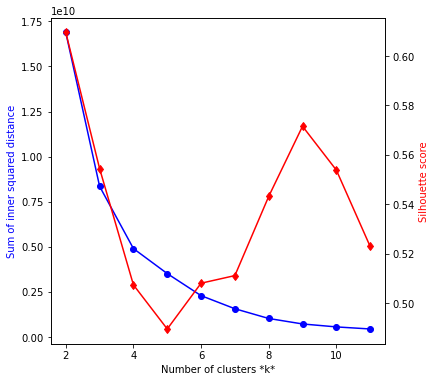

In [45]:
# Evaluate KMeans first to choose K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


sse = []
sil = []
list_k = list(range(2, 12))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(feature)
    sse.append(km.inertia_)
    sil.append(silhouette_score(feature, km.labels_))

fig, ax1 = plt.subplots(figsize=(6, 6))

ax2 = ax1.twinx()
ax1.plot(list_k, sse, 'bo-')
ax2.plot(list_k, sil, 'rd-')

ax1.set_xlabel(r'Number of clusters *k*')
ax1.set_ylabel('Sum of inner squared distance', color='b')
ax2.set_ylabel('Silhouette score', color='r')

plt.show()

From the figure, we can see Sum of Squared Distance going down when K becomes bigger. Silhouette Score also going down until K=5 but going up start K=6, then going down again start k=10. we choose K=9 for this project, it's a balanced number for both Sum of Squared Distance and Silhouette Score. Let's run the K-Means algorithm again with K=9.

In [46]:
# Run K-Means clustering algorithm again with best K
number_of_clusters = 9
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(feature)
# Show cluster for some cells
kmeans.labels_[0:10]

array([7, 6, 7, 7, 0, 1, 4, 1, 6, 5], dtype=int32)

In [47]:
X['Cluster'] = kmeans.labels_
X.head()

,Neighborhood,Area,Population,Density,Health,Education,Latitude,Longitude,Cinemas in Neighborhood,Malls in Neighborhood,Cluster
0,Tegalsari,4300,85606,19.908372,78.5,94.3,-7.275490,112.736792,0.0,0.0,7
1,Genteng,4100,46548,11.353171,78.1,94.4,-7.258943,112.744854,3.0,5.0,6
2,Bubutan,3900,84465,21.657692,75.8,84.4,-7.248752,112.727749,1.0,0.0,7
3,Simokerto,2600,79319,30.507308,74.7,83.2,-7.239466,112.753292,0.0,2.0,7
4,Pabean Cantian,6800,69423,10.209265,73.0,84.6,-7.219347,112.733570,0.0,0.0,0


In [48]:
# create a numpy array of number of cluster
threshold_scale = np.linspace(X['Cluster'].min(),
                              X['Cluster'].max(),
                              number_of_clusters, dtype=float)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

In [49]:
# create map
def maps_style(feature):
    return { 'color': 'grey' }

sby_center_x, sby_center_y = lonlat_to_xy(surabaya_center[1], surabaya_center[0]) # City center in Cartesian coordinates
surabaya_boroughs = geoJson if From_IBM_Cloud else read_geojson(geoJson)
center = xy_to_lonlat((sby_max_x+sby_min_x)/2, (sby_max_y+sby_min_y)/2)
map_clusters = folium.Map(location=(center[1], center[0]), zoom_start=12)
folium.GeoJson(surabaya_boroughs, style_function= maps_style, name='geojson').add_to(map_clusters)

# add markers to the map
x = np.arange(number_of_clusters)
ys = [i + x + (i*x)**2 for i in range(number_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(X['Latitude'], X['Longitude'], X['Neighborhood'], X['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters    

After we classify each region into 9 clusters. Now, we will calculate the score for each cluster to get an insight into which clusters have the potential to open cinema. Because our criterion is an area with a large number of malls but few cinemas, then we use the formula for the average number of malls in the cluster minus the average number of cinemas in the cluster. The following is the calculation result after sorted.



In [50]:
# get weighted Mall Score
X['Mall Score'] = X['Malls in Neighborhood'] 
# get weighted Cinema Score
X['Cinema Score'] = X['Cinemas in Neighborhood'] 
# get Score based on Cinema Score and Mall Score
X['Score'] = X['Mall Score'] - X['Cinema Score']

In [51]:

# Group the dataset by cluster and sort by Score in descending order
result = X.drop(columns=['Latitude', 'Longitude']).groupby(['Cluster'])['Population', 'Density', 'Area', 'Education', 'Health', 'Malls in Neighborhood', 'Cinemas in Neighborhood', 'Mall Score', 'Cinema Score', 'Score'].mean().sort_values(by='Score', ascending=False)

result

,Population,Density,Area,Education,Health,Malls in Neighborhood,Cinemas in Neighborhood,Mall Score,Cinema Score,Score
Cluster,,,,,,,,,,
2,120478.500000,5.398255,22400.000000,87.900000,75.800000,1.500000,0.000000,1.500000,0.000000,1.500000
3,53458.250000,2.425411,22125.000000,85.125000,75.325000,0.750000,0.000000,0.750000,0.000000,0.750000
4,101272.000000,9.936251,10700.000000,86.975000,76.550000,0.500000,0.000000,0.500000,0.000000,0.500000
8,130669.000000,15.843879,8250.000000,91.450000,76.700000,2.000000,1.500000,2.000000,1.500000,0.500000
6,43122.600000,7.547607,7300.000000,88.820000,76.880000,1.000000,0.600000,1.000000,0.600000,0.400000
0,68119.166667,8.265838,8933.333333,88.450000,76.150000,0.666667,0.333333,0.666667,0.333333,0.333333
7,82416.500000,20.969667,4400.000000,88.375000,76.375000,0.500000,0.250000,0.500000,0.250000,0.250000
1,161824.000000,20.962264,7833.333333,86.833333,75.133333,0.000000,0.000000,0.000000,0.000000,0.000000
5,204805.000000,22.756111,9000.000000,88.600000,76.600000,0.000000,0.000000,0.000000,0.000000,0.000000


Cluster 2 has highest score, it has more shopping malls and fewer movie theaters.

Let's explore more characteristics of cluster 2.

In [52]:
X[X['Cluster']==2].drop(columns=['Latitude', 'Longitude']).describe()

,Area,Population,Density,Health,Education,Cinemas in Neighborhood,Malls in Neighborhood,Cluster,Mall Score,Cinema Score,Score
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.0,2.000000,2.0,2.000000
mean,22400.000000,120478.500000,5.398255,75.800000,87.900000,0.0,1.500000,2.0,1.500000,0.0,1.500000
std,1838.477631,856.306312,0.481289,0.424264,2.404163,0.0,0.707107,0.0,0.707107,0.0,0.707107
min,21100.000000,119873.000000,5.057932,75.500000,86.200000,0.0,1.000000,2.0,1.000000,0.0,1.000000
25%,21750.000000,120175.750000,5.228094,75.650000,87.050000,0.0,1.250000,2.0,1.250000,0.0,1.250000
50%,22400.000000,120478.500000,5.398255,75.800000,87.900000,0.0,1.500000,2.0,1.500000,0.0,1.500000
75%,23050.000000,120781.250000,5.568417,75.950000,88.750000,0.0,1.750000,2.0,1.750000,0.0,1.750000
max,23700.000000,121084.000000,5.738578,76.100000,89.600000,0.0,2.000000,2.0,2.000000,0.0,2.000000


Let's plot all clusters for comparison of each feature in bar charts using matplotlib.pyplot library. We highlight Cluster 2 which is our target cluster.

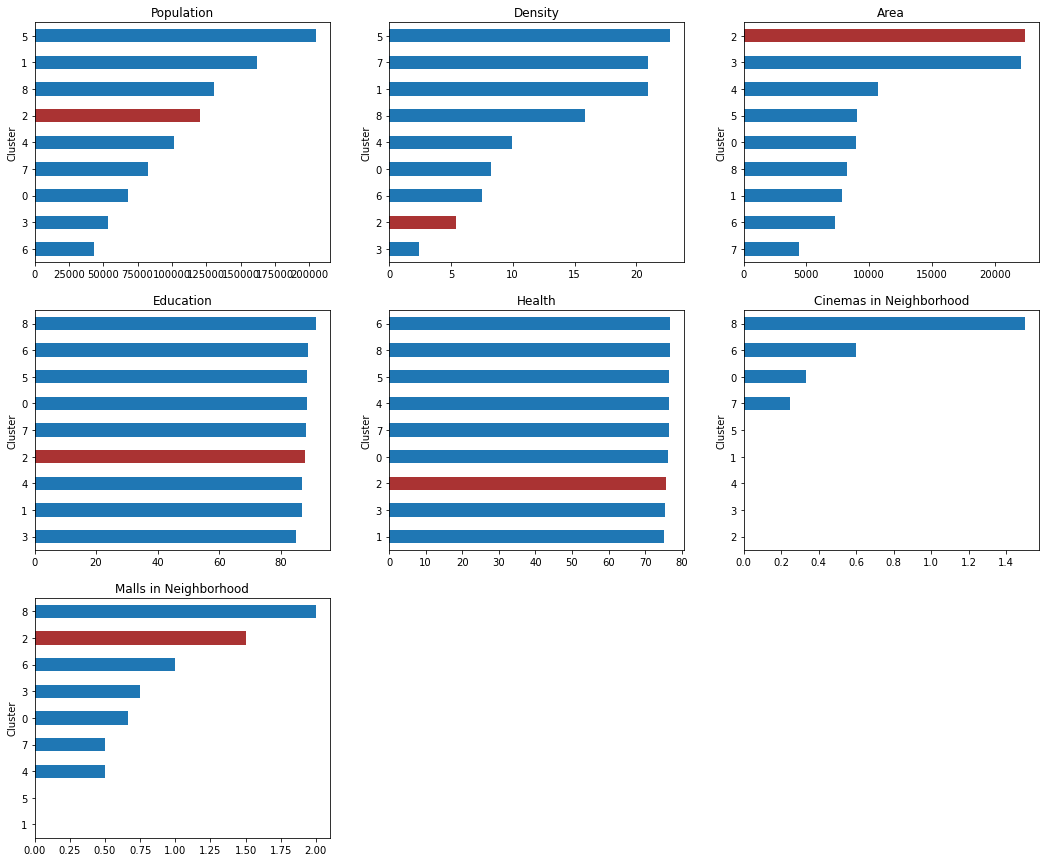

In [53]:
import matplotlib.pyplot as plt

def draw_barchart(dataframe, highlight_index):
    fig = plt.figure(figsize=(18, 15))
    n_rows = n_cols = math.ceil(math.sqrt(dataframe.columns.size))
    for i, col in enumerate(dataframe.columns):
        df = dataframe[[col]].sort_values(by=col)
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df.plot.barh(ax=ax)
        pos = df.index.get_loc(highlight_index)
        ax.patches[pos].set_facecolor('#aa3333')
        ax.set_title(col)
        ax.get_legend().remove()
    # fig.tight_layout()
    plt.show()

draw_barchart(result[['Population', 'Density', 'Area', 'Education', 'Health',
                      'Cinemas in Neighborhood', 'Malls in Neighborhood']], 2)

From the bar chart, we can see that Cluster 2 has the most wide Area among all the clusters. Furthermore, it has fairly more shopping centers area and don't have any movie theaters.

Next, we sort all borough in Cluster 2 by Score in descending. They will be our first choice position to open a cinema.

In [54]:
selection_df = X[X['Cluster'] == 2].sort_values(['Score'], ascending=[False]).head(5)
selection_df[['Neighborhood', 'Population', 'Density', 'Area', 'Education', 'Health',
                      'Cinemas in Neighborhood', 'Malls in Neighborhood', 'Mall Score', 'Cinema Score', 'Score']]

,Neighborhood,Population,Density,Area,Education,Health,Cinemas in Neighborhood,Malls in Neighborhood,Mall Score,Cinema Score,Score
14,Sukolilo,119873,5.057932,23700,89.6,75.5,0.0,2.0,2.0,0.0,2.0
11,Rungkut,121084,5.738578,21100,86.2,76.1,0.0,1.0,1.0,0.0,1.0


As the above statistics information, there are 1~2 shopping malls, but without any movie theater. Looks quite good selections.

## 5. Result and Discussions

We grouped sub-districts in the city of Surabaya into 9 clusters according to census data including population, density, area, education, and health. Existing shopping center information and cinema information are also considered when running the clustering algorithm.

After the K-Means Clustering machine learning algorithm, we got a cluster with most of the shopping malls and on average fewer cinemas. We also find other characteristics of the clusters. This shows that the cluster has the largest area.

We sorted all areas of the cluster by shopping mall and cinema info in descending order targeting to cover more shopping malls and fewer cinemas.

We draw our conclusions with the 2 most promising sub-districts that meet all our conditions, is **Sukolilo** and **Rungkut**. This recommended zone will be a good starting point for further analysis. Other factors that can be considered, eg. real traffic data and revenue of each cinema, the average income of citizens, and more specific locations. They will be of great help in finding more accurate results.

## 6. Conclusion

This project aims is to find a Neighborhood in the city of Surabaya to open a cinema. After taking data from multiple data sources and processing it into clean data frames, applying the K-Means clustering algorithm, we chose a cluster with more shopping malls and on average fewer cinemas. From these clusters, it was found that the two most promising sub-districts were used as starting points for final exploration by stakeholders.

The final decision on the optimal cinema’s location will be made by stakeholders based on the specific characteristics of the environment and location in each recommended zone, taking into account additional factors such as real traffic data and revenue of each cinema, the average income of citizens, and more specific locations, etc.